# Data

https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets

The data is collected using tweepy Python package to access Twitter API. 

Dates: 12/31/2020 - 04/13/2021

Total number of tweets: 56585

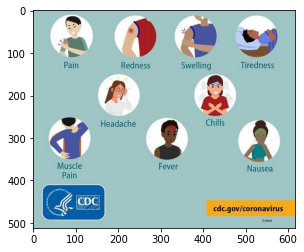

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/MyDrive/CoVaxSideEffect/CDCsideEffects.png')
plt.imshow(img)

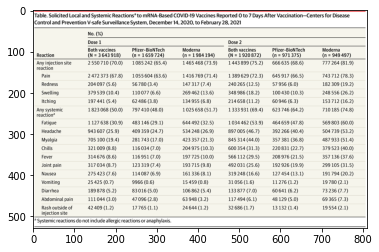

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/CoVaxSideEffect/VsafeReport.png')
plt.imshow(img)

# Questions:
1. What is the possiblity that your shot is largely uneventful or which side effects are more rare/common?

2. Can social media aid as a way to track rare/unknown side effects? National healthcare officials are taking each and every report of adverse side effects seriously — a major reason why the single-dose Johnson & Johnson vaccine is currently on pause following 6 incidents of extremely rare blood clotting.

# Ideas

1. Social media data can produce rich and useful insights that were previously impossible in both scale and extent.

2. I applied  natural  language  processing  (NLP)  to  understand  public opinions, experiences, and issues with respect to the COVID-19 vaccine side effects using data from Twitter.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tweet-preprocessor
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import preprocessor as p
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
import collections
import matplotlib.pyplot as plt
from nltk import bigrams,trigrams
from datetime import timedelta, datetime
import networkx as nx

In [ ]:
# reading in csv file
df = pd.read_csv('/content/drive/MyDrive/CoVaxSideEffect/vaccination_all_tweets.csv')
len(df)

56585

In [ ]:
#remove retweets
# takes forever to use drop, do not use
retweets = df.text.str.startswith('RT')
df = df[retweets == False]

# Data Preprocessing

Removed urls, emojis, numbers, punctuation marks and any word that is less than 3 character long.

Converted all to lowercase.

In [ ]:
# function to clean tweets tweet preprocessor library
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.NUMBER)
def clean_text(input_str):
  input_str = input_str.lower()
  input_str = p.clean(input_str) #tweet preprocessor library
  #contr_pattern = re.compile(r'\b(' + '|'.join(contr_dic.keys()) + r')\b')
  #input_str = contr_pattern.sub(lambda x: contr_dic[x.group()], input_str)
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  input_str = url_pattern.sub(r'', input_str) #remove url
  input_str = input_str.replace("#", "").replace("_", " ") #remove all # and _ signs
  input_str = re.sub(r'[^\w]', ' ',input_str)
  input_str = ''.join(i for i in input_str if not i.isdigit())
  input_str = re.sub(r'\s+', ' ',   input_str)  # Eliminate duplicate whitespaces using wildcards
  input_str = re.sub(r'(?:^| )\w(?:$| )', ' ', input_str).strip() #removes any single letter words
  input_str = input_str.lstrip()
  #input_str = TextBlob(input_str).correct()
  #input_str = re.sub('\S*@\S*\s?', '', input_str)  # remove emails
  #input_str = re.sub("\'", "", input_str)  # remove single quotes
  #input_str = gensim.utils.simple_preprocess(str(input_str), deacc=True)
  return input_str

# actually cleaning tweets
tweets = list(df['text'])
for i in range(0, len(tweets)):
  tweets[i] = clean_text(tweets[i])
df['cleaned_tweets'] = tweets

# Filtering for Side Effect Related Tweets

In [59]:
se_filter = 'side effect|pain|redness|swell|swollen|sore|tender|rash|covid arm|itch|fatigue|ach|tired|chill|fever|nause|cough|vomit|shiever|diarrhea|cough|breath|taste|smell|congestion|nose|chest|confusion|wake|skin|flulike'
#extra = got vaccine|got my vaccine|got my covid vaccine|gotmyvaccine|gotvaccinated|gotmycovidvaccine|gotmyfirstdose|gotmyseconddose|got first dose|got second dose|got my first dose|got my second dose|got my st dose|got my nd dose|gotmystdose|gotmynddose|got the shot|got my shot|gottheshot|gotvaccinated|gotmyvaccine|gotmycovidvaccine|had covid shot|hadcovidshot|firstcovid|secondcovid|first covid|second covid|st covid|nd covid|stcovid|ndcovid|stshot|ndshot|stvaccine|ndvaccine|stdose|nddose|st shot|nd shot|st dose|nd dose|st vaccine|nd vaccine'
df2 = df[df.cleaned_tweets.str.contains(se_filter ,case=False)].copy()

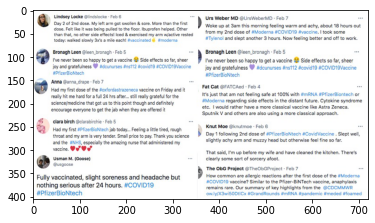

In [60]:
img = mpimg.imread('/content/drive/MyDrive/CoVaxSideEffect/ExampleTweets.jpg')
plt.imshow(img)

In [61]:
pd.set_option('display.max_colwidth', None)
#df2.text[1100:1140]

(-0.5, 999.5, 499.5, -0.5)

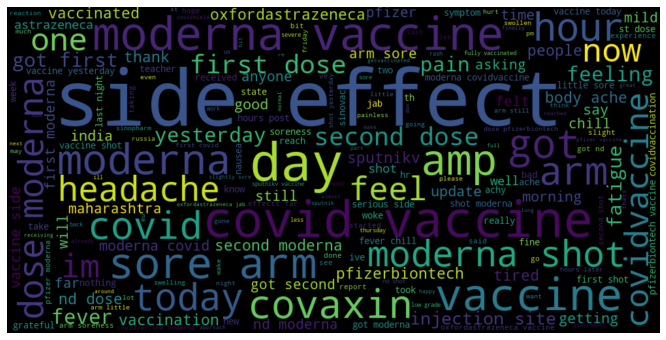

In [62]:
from wordcloud import WordCloud
words = ' '.join([word for word in df2['cleaned_tweets']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

# Further Data Processing

Applied tokenization.

Removed stopwords and words commonly used in vaccine tweets but not related to side effects such as vaccine names, places etc.

In [63]:
stop_words = stopwords.words('english')
#we can extend stop words if we wish
stop_words.extend(['days','yesterday','done','everything','open','hours','thank','news','amp','rt','im','via','million','https','lol','omg','yo','st','haha','hey','ad','says','know','need','go','made','said','http','gt','rap','be','nd','st','th','to','pm','am','na','ta','rd','ave','iot','post','youtube','video','watch','follow','like','retweet','tweet','following','away','back','full','final','finally','also','everyone','anyone','someone','third','last','always','already','since','today','tonight','year','day','months','tomorrow','weekend','morning','weeks','week','time','get','dont','new','big','little','small','available','best','top','yet','could','alone','within','want','going','let','january','february','march','april','please','many','update','they','i','even','would','will','might','may','next','guy','lady','hot','back','way','soon','ago','old','yeah','yes','no','nothing','one','two','three','four','sexy','fuck','shit','really','people','real', 'must', 'much', 'bitch', 'far', 'half', 'hard', 'true', 'take','go','man', 'woman', 'wife', 'husband', 'city', 'male', 'female', 'date', 'month', 'group', 'ever', 'still', 'single', 'absolutely','ng','aint', 'lmao', 'about','bout', 'yall', 'thing', 'night', 'think', 'look', 'say', 'make', 'see', 'right', 'thanks' ])
vaccinenames = ['covishield','biontech','moderna','covaxin','sputnikv','oxfordastrazenaca','astrazenaca','pfizer','pfizerbiontech','sinovac','sinopharm','oxfordastrazeneca','oxford','johnsonandjohnson','astrazeneca','sputnik','covidvaccination','sputnikvaccine','bharat','biotech','bharatbiotech','ocgn','ocugen','modernas','pfizervaccine','novavax']
vaxdevop = ['fda','supply','clinical','trial','trials','phase','approved','approval','administered','emergency','use','mrna','science','data','study','developed']
gencovid = ['coronavirus','corona','covid','pandemic','hospital','stay','home','stayhome','virus','safe','safety','health','cases','dr','dr.']
genvax = ['vaccine','shot','dose','got','first','second','covidvaccine','shots','side effect','side effects','side','effect','vaccines','vaccination','vaccinated','getvaccinated','arrived','batch','jab','took','dose','first','second','doses','receive','received','receiving','given','taking','getting','effects','efficacy','effective','received','feeling','taking','reporting','getting']
places = ['india','canada','usa','russia','china','chinese','russian','delhi','russias','toronto','moscow','italy','spain','france','germany','us','usa','ontario','brazil','hong','kong','country','uk','indian','pakistan','govt','government','world','prime','minister','president','eu','countries','narendramodi','trudeau','modi','aiims','narendra','maharashtra']
stop_words.extend(vaccinenames)
stop_words.extend(vaxdevop)
stop_words.extend(gencovid)
stop_words.extend(genvax)
stop_words.extend(places)

In [64]:
# apply tokenization
df2['tokenized'] = df2['cleaned_tweets'].apply(word_tokenize)
# removing stopwords
df2['stopwords_removed'] = df2['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
tweets2 = df2['stopwords_removed'].tolist()
tweets2 = [x for x in tweets2 if x] 
len(tweets2)

4235

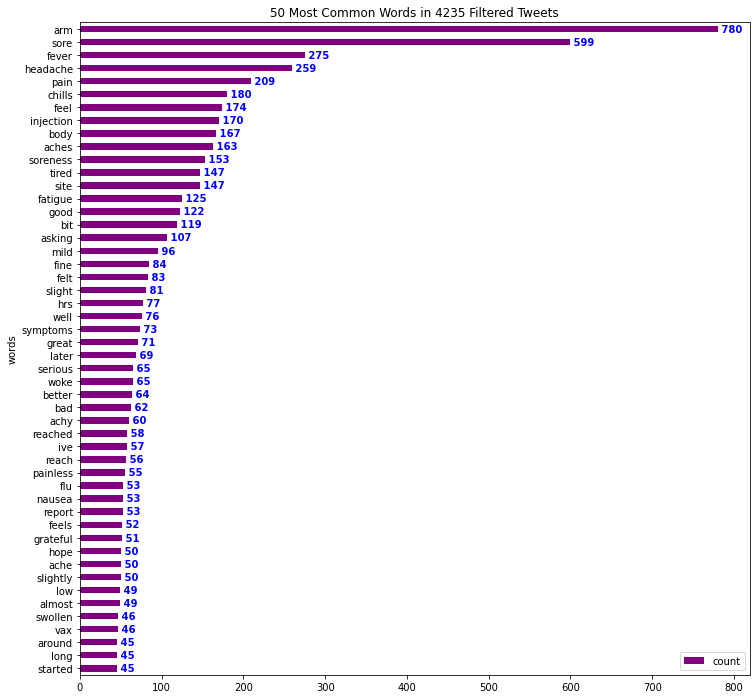

<Figure size 432x288 with 0 Axes>

In [65]:
# Flatten list of words in clean tweets
all_words = list(itertools.chain(*tweets2))
#all_words = [e for e in all_words if e not in ('headache','fatigue','tired','fever')]
# Create counter of words in clean tweets
counts= collections.Counter(all_words)
counts_df = pd.DataFrame(counts.most_common(50),columns=['words', 'count'])
counts_df = counts_df.sort_values(by='count')
fig, ax = plt.subplots(figsize=(12, 12))
# Plot horizontal bar graph
counts_df.plot.barh(x='words', y='count',ax=ax,color="purple")
title = "50 Most Common Words in 4235 Filtered Tweets"
ax.set_title(title)
for i, v in enumerate(counts_df['count']):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()
plt.savefig(title)

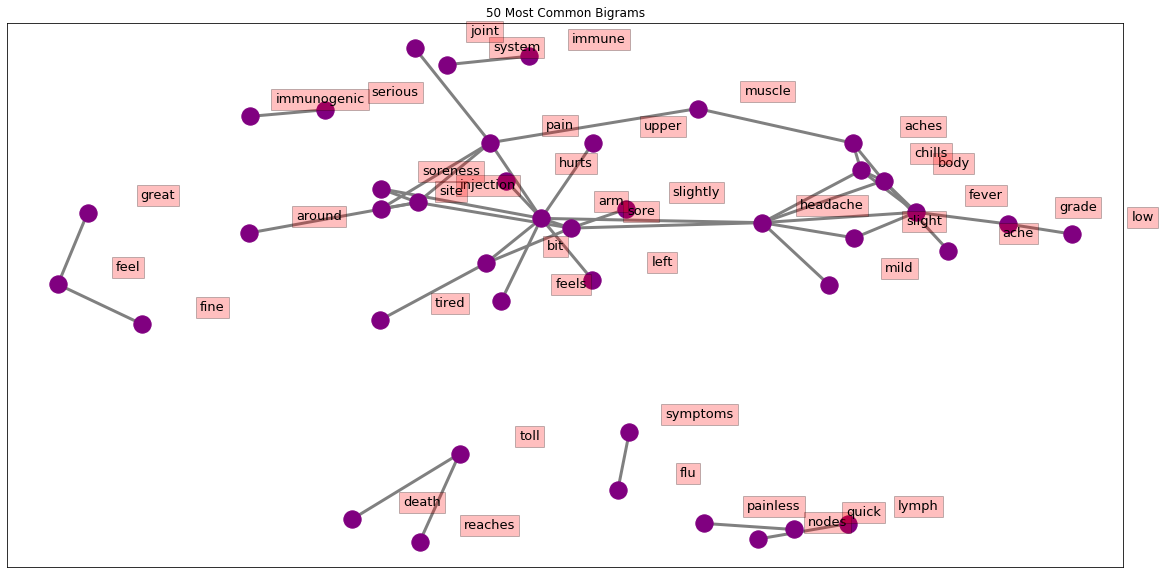

<Figure size 432x288 with 0 Axes>

In [66]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets2]
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.spring_layout(G, k=2)
# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='grey',node_color='purple',with_labels = False,ax=ax)
# Create offset labels
for key, value in pos.items():
  x, y = value[0]+.135, value[1]+.045
  ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)
title = "50 Most Common Bigrams"
ax.set_title(title)
plt.show()
plt.savefig(title)